In [1]:
# General
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

# Paths and Files
from pathlib import Path
import os

# Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model development and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
import hvplot.pandas
import seaborn as sns

# Quality of life improvements
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to improve readability

---

## Loading the Data

In [2]:
# 10-year Treasury Bonds

# Initialize an empty dataframe
ten_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/10_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    ten_year_treasury_bond_df = pd.concat(
        [
            ten_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
ten_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
ten_year_treasury_bond_df.index = pd.to_datetime(ten_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
ten_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

ten_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1980-01-02,10.482,10.482,10.482,10.482,1.67%
1980-01-03,10.584,10.584,10.584,10.584,0.97%
1980-01-04,10.636,10.636,10.636,10.636,0.49%
1980-01-07,10.610,10.610,10.610,10.610,-0.24%
1980-01-08,10.553,10.553,10.553,10.553,-0.54%


In [3]:
# 2-year Treasury Bonds

# Initialize an empty dataframe
two_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/2_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    two_year_treasury_bond_df = pd.concat(
        [
            two_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
two_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
two_year_treasury_bond_df.index = pd.to_datetime(two_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
two_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

two_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1988-02-26,7.159,7.159,7.159,7.159,-0.47%
1988-02-29,7.125,7.125,7.125,7.125,-0.47%
1988-03-01,7.108,7.108,7.108,7.108,-0.24%
1988-03-02,7.090,7.090,7.090,7.090,-0.25%
1988-03-03,7.090,7.090,7.090,7.090,0.00%


In [4]:
# 3-month Treasury Bonds

# Initialize an empty dataframe
three_month_treasury_bond_df = pd.DataFrame(columns=["DATE","DTB3"])

# Set the folder path
folder_path = Path("./Resources/3_month_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    three_month_treasury_bond_df = pd.concat(
        [
            three_month_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
three_month_treasury_bond_df.set_index('DATE', inplace=True)

# Format the index as a datetime
three_month_treasury_bond_df.index = pd.to_datetime(three_month_treasury_bond_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
three_month_treasury_bond_df.sort_values(by=['DATE'], inplace=True)

three_month_treasury_bond_df.head()

,DTB3
DATE,
1954-01-04,1.330
1954-01-05,1.280
1954-01-06,1.280
1954-01-07,1.310
1954-01-08,1.310


In [5]:
# S&P Prices (OLD)

# Initialize an empty dataframe
sp500_old_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Vol.","Change %"])

# Set the folder path
folder_path = Path("./Resources/sp500_old")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_old_df = pd.concat(
        [
            sp500_old_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_old_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_old_df.index = pd.to_datetime(sp500_old_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
sp500_old_df.sort_values(by=['Date'], inplace=True)

sp500_old_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1979-12-26,107.8,107.8,108.4,107.1,NaN,0.09%
1979-12-27,108.0,108.0,108.5,107.1,NaN,0.19%
1979-12-28,107.8,107.8,108.6,107.2,NaN,-0.19%
1979-12-31,107.9,107.9,108.5,107.3,NaN,0.09%
1980-01-01,107.9,107.9,107.9,107.9,NaN,0.00%


In [6]:
# S&P Prices

# Initialize an empty dataframe
sp500_df = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

# Set the folder path
folder_path = Path("./Resources/sp500")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_df = pd.concat(
        [
            sp500_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_df.index = pd.to_datetime(sp500_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
sp500_df.sort_values(by=['Date'], inplace=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


In [7]:
# T-Bill Summary

# Initialize an empty dataframe
tbill_summary_df = pd.DataFrame(columns=["date","US1M","US3M","US6M","US1Y","US2Y","US3Y","US5Y","US7Y","US10Y","US20Y","US30Y"])

# Set the folder path
folder_path = Path("./Resources/summary_spreadsheet")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    tbill_summary_df = pd.concat(
        [
            tbill_summary_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
tbill_summary_df.set_index('date', inplace=True)

# Format the index as a datetime
tbill_summary_df.index = pd.to_datetime(tbill_summary_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
tbill_summary_df.sort_values(by=['date'], inplace=True)

tbill_summary_df.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [8]:
# Review the tbill_summary_df
# tbill_summary_df.loc[tbill_summary_df['US30Y'].isna() != True].head()

## DC Start

### Helper Functions

### Confusion Matrix Plot Function

In [9]:
def plot_confusion_matrix(
    cm, # confusion_matrix from sklearn.metrics
    classes, # formatted as a list, e.g. ['sell','buy']
    title=None, # Title of the plot
    normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='confusion_matrix', # Filename in the savefig string
    cmap='gray_r', # Inverse grayscale
    linecolor='k', # Set the line color to black
    labelplot=False # Label the plot with TP, FP, FN, and TN
    ):

    # If the labelplot is turned on, then treat the composite text as a string
    if labelplot:
        fmt = 's'
    else:
        # If labelplot is turned off, but the confusion_matrix is normalized, then format the string as having 3 integers to the right of the decimal
        if normalize:
            fmt = '.3f'
        # If labelplot is turned off and the confusion matrix is not normalized, then format the string as a decimal integer
        else:
            fmt = 'd'

    # The confusion_matrix text, as oriented in sklearn.metrics.confusion_matrix
    cm_text = np.array([['(TN)','(FP)'],['(FN)','(TP)']])

    # Create the annotation text for Seaborn
    # If labelplot is true, add the "TN, FP, FN, and TP" text to the confusion matrix values
    if labelplot:
        # If the confusion matrix is normalized, format the data as a string having 3 integers to the right of the decimal
        if normalize:
            annot_text = (
                np.asarray(
                    [
                        "{0:.3f}\n{1}".format(data, text) for data, text in zip(cm.flatten(), cm_text.flatten())
                    ]
                )
        ).reshape(2, 2)
        # If the confusion matrix is not normalized, format the string as a decimal integer
        else:
            annot_text = (
                np.asarray(
                    [
                        "{0:d}\n{1}".format(data, text) for data, text in zip(cm.flatten(), cm_text.flatten())
                    ]
                )
            ).reshape(2, 2)
    # If labelplot is false, then only print the confusion matrix values
    else:
        annot_text = True
    
    # Create a figure instance and set the figure size in inches
    # The figure size includes the title and labels
    fig, ax = plt.subplots(figsize=(3,3))

    # Plot the confusion_matrix using the heatmap function
    sns.heatmap(
        cm, 
        fmt=fmt, 
        annot=annot_text, 
        square=True,
        xticklabels=classes,
        yticklabels=classes,
        cmap=cmap,
        vmin=0,
        vmax=0,
        linewidths=0.5,
        linecolor=linecolor,
        cbar=False
    )

    # Return the outer borders using despine
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title(title) # Set the plot title
    plt.ylabel('Actual outcome') # Set the y-axis label
    plt.xlabel('Predicted outcome') # Set the x-axis label
    plt.tight_layout() # Remove whitespace around the plot
    plt.savefig(Path(f"./Reports/{filename}_confusion_matrix.png")) # Save the figure
    plt.show()

### Cumulative Returns Plotting Function

In [10]:
def cumulative_returns_plot(
    predictions_df_arg # Dataframe with only daily return values
    , plot_filename # Filename for saving the plot
    , plot_title_text="Cumulative Returns:" # Variable and default value for the plot title
):

    # Initialize the figure, including the size
    fig = (1 + predictions_df_arg).cumprod().plot(
        figsize=(14,8)
    )
    
    # Add a title to the plot
    plt.title(f"{plot_title_text}") 
    
    # Create a variable that refers to the axis
    ax = plt.gca()
    
    # Set the x- and y-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent')
    
    # Format the y-axis as a percentage
    # The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Rescale the axis boundaries
    # ax.axis([
    #     min(signals_df.index) - (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Minimum value on the x-axis
    #     max(signals_df.index) + (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Maximum value on the x-axis
    #     0,
    #     1.4
    # ])
    
    # Add a horizontal line to improve readability
    # ax.axhline(y=1, color='k', linestyle="--", alpha=0.2)
    
    # Create a light grid to improve readability
    ax.grid(which='major', color='k', linestyle='--', alpha=0.2)
    
    # Set the legend paramters
    plt.legend(
        framealpha=1.0, # Make the legend opaque
        edgecolor='k' # Set the edge color to black
    )

    # Reduce the whitespace around the plot
    plt.tight_layout()
    
    # Save the figure as a PNG
    relative_file_path = "./Plots/" + str(plot_filename) + ".png"
    plt.savefig(Path(relative_file_path))
    
    return plt.show()

### Reviewing the Dataframe:

In [11]:
# Review the S&P 500 data
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


### Creating a reference dataframe for standardization:

In [12]:
# # Create a reference dataframe

# Move the Adjusted Close data to the new dataframe
# sp500_reference_dataframe = sp500_df[['Adj Close']].copy()
sp500_reference_dataframe = sp500_df[['Adj Close']].loc["1999-12-15":"2024-01-01"].copy()
# sp500_reference_dataframe = sp500_df[['Adj Close']].loc["2022-01-01":"2022-06-01"].copy()

# Create a Daily Returns column from the Close data
sp500_reference_dataframe['Daily Returns'] = sp500_reference_dataframe['Adj Close'].pct_change()

### Manual Signals

In [13]:
# Make a copy of the S&P Close dataframe
manual_signals_df = sp500_df[['Adj Close']].copy()

manual_signals_df['Manual Signal'] = 0.0
manual_signals_df.loc["1962-01-02":"1968-11-28", 'Manual Signal'] = 1.0
manual_signals_df.loc["1970-05-26":"1973-01-10", 'Manual Signal'] = 1.0
manual_signals_df.loc["1974-10-03":"1976-12-30", 'Manual Signal'] = 1.0
manual_signals_df.loc["1982-08-12":"1987-08-24", 'Manual Signal'] = 1.0
manual_signals_df.loc["1987-12-04":"1990-07-15", 'Manual Signal'] = 1.0
manual_signals_df.loc["1990-10-11":"2000-03-22", 'Manual Signal'] = 1.0
manual_signals_df.loc["2002-10-09":"2007-10-08", 'Manual Signal'] = 1.0
manual_signals_df.loc["2009-03-09":"2010-04-22", 'Manual Signal'] = 1.0
manual_signals_df.loc["2010-07-02":"2011-04-28", 'Manual Signal'] = 1.0
manual_signals_df.loc["2011-10-03":"2018-09-19", 'Manual Signal'] = 1.0
manual_signals_df.loc["2018-12-24":"2020-02-18", 'Manual Signal'] = 1.0
manual_signals_df.loc["2020-03-23":"2022-01-03", 'Manual Signal'] = 1.0
manual_signals_df.loc["2022-10-12":"2024-01-08", 'Manual Signal'] = 1.0

manual_signals_df = manual_signals_df.dropna()

manual_signals_df.head()

,Adj Close,Manual Signal
Date,,
1962-01-02,70.959999,1.0
1962-01-03,71.129997,1.0
1962-01-04,70.639999,1.0
1962-01-05,69.660004,1.0
1962-01-08,69.120003,1.0


### Trading Signals: SMA Window Comparison

In [14]:
# # Trading Signals: SMA Window Comparison

# Create the dataframe
sma_window_comparison_df = sp500_reference_dataframe.copy()

# Set the short and long SMA windows (in days)
sma_short_window = 4
sma_long_window = 15

# Create columns for the Rolling Window values
sma_window_comparison_df['Short SMA'] = sma_window_comparison_df['Adj Close'].rolling(window=sma_short_window).mean()
sma_window_comparison_df['Long SMA'] = sma_window_comparison_df['Adj Close'].rolling(window=sma_long_window).mean()

# Create a trading signal based on the SMAs
sma_window_comparison_df['SMA Signal'] = np.where(sma_window_comparison_df['Short SMA'] >= sma_window_comparison_df['Long SMA'], 1.0, 0.0)

# Create a SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_window_comparison_df['SMA Signal Daily Returns'] = sma_window_comparison_df['Daily Returns'] * sma_window_comparison_df['SMA Signal'].shift()

In [15]:
# # Clean up the Dataframe and review it

# Drop the rows with NAs
sma_window_comparison_df = sma_window_comparison_df.dropna()

# Review the Dataframe
sma_window_comparison_df.head(50)

,Adj Close,Daily Returns,Short SMA,Long SMA,SMA Signal,SMA Signal Daily Returns
Date,,,,,,
2000-01-05,1402.109985,0.001922,1431.500000,1437.854663,0.0,0.000000
2000-01-06,1403.449951,0.000956,1415.049988,1437.195996,0.0,0.000000
2000-01-07,1441.469971,0.027090,1411.612488,1438.708659,0.0,0.000000
2000-01-10,1457.599976,0.011190,1426.157471,1441.146655,0.0,0.000000
2000-01-11,1438.560059,-0.013063,1435.269989,1442.511328,0.0,-0.000000
2000-01-12,1432.250000,-0.004386,1442.470001,1442.432658,1.0,-0.000000
2000-01-13,1449.680054,0.012170,1444.522522,1443.335995,1.0,0.012170
2000-01-14,1465.150024,0.010671,1446.410034,1443.789998,1.0,0.010671
2000-01-18,1455.140015,-0.006832,1450.555023,1443.659334,1.0,-0.006832


### Trading Signals: SMA Inertia

In [16]:
# # SMA Inertia Signals

# Create the dataframe
sma_inertia_df = sp500_reference_dataframe.copy()

# Set the inertia SMA window (in days)
sma_inertia_window = 4

# Create columns for the Rolling Window value
sma_inertia_df['Inertia SMA'] = sma_inertia_df['Adj Close'].rolling(window=sma_inertia_window).mean()

# Create a Daily Returns column
sma_inertia_df['Inertia SMA Daily Returns'] = sma_inertia_df['Inertia SMA'].pct_change()

# Create a trading signal based on the inertial SMA
sma_inertia_df['Inertia SMA Signal'] = np.where(sma_inertia_df['Inertia SMA Daily Returns'] >= 0, 1.0, 0.0)

# Create an Inertia SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_inertia_df['Inertia SMA Signal Daily Returns'] = sma_inertia_df['Daily Returns'] * sma_inertia_df['Inertia SMA Signal'].shift()

In [17]:
# # Clean up the Dataframe and review it

# Drop the rows with NAs
sma_inertia_df = sma_inertia_df.dropna()

# Review the Dataframe
sma_inertia_df.head(50)

,Adj Close,Daily Returns,Inertia SMA,Inertia SMA Daily Returns,Inertia SMA Signal,Inertia SMA Signal Daily Returns
Date,,,,,,
1999-12-21,1433.430054,0.010817,1422.832520,0.003544,1.0,0.000000
1999-12-22,1436.130005,0.001884,1427.170014,0.003048,1.0,0.001884
1999-12-23,1458.339966,0.015465,1436.497498,0.006536,1.0,0.015465
1999-12-27,1457.099976,-0.000850,1446.250000,0.006789,1.0,-0.000850
1999-12-28,1457.660034,0.000384,1452.307495,0.004188,1.0,0.000384
1999-12-29,1463.459961,0.003979,1459.139984,0.004705,1.0,0.003979
1999-12-30,1464.469971,0.000690,1460.672485,0.001050,1.0,0.000690
1999-12-31,1469.250000,0.003264,1463.709991,0.002080,1.0,0.003264
2000-01-03,1455.219971,-0.009549,1463.099976,-0.000417,0.0,-0.009549


### Trading Signals: Balanced Inertia, including future information

Note: These signals should be near perfect

In [18]:
# # SMA Balanced Inertia Signals

# Create the dataframe
sma_balanced_inertia_df = sp500_reference_dataframe.copy()

# Set the inertia SMA window (in days)
# Note this value must be odd
sma_balanced_inertia_window = 31

# If necessary, force the value to be odd
if sma_balanced_inertia_window % 2 == 0:
    sma_balanced_inertia_window += 1

# Create columns for the Rolling Window value
sma_balanced_inertia_df['Balanced Inertia SMA'] = sma_balanced_inertia_df['Adj Close'].rolling(window=sma_inertia_window, center=True).mean()

# Create a Daily Returns column
sma_balanced_inertia_df['Balanced Inertia SMA Daily Returns'] = sma_balanced_inertia_df['Balanced Inertia SMA'].pct_change()

# Create a trading signal based on the balanced inertial SMA
sma_balanced_inertia_df['Balanced Inertia SMA Signal'] = np.where(sma_balanced_inertia_df['Balanced Inertia SMA Daily Returns'] >= 0, 1.0, 0.0)

# Create a Balanced Inertia SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_balanced_inertia_df['Balanced Inertia SMA Signal Daily Returns'] = sma_balanced_inertia_df['Daily Returns'] * sma_balanced_inertia_df['Balanced Inertia SMA Signal'].shift()

In [19]:
sma_balanced_inertia_df.head(20)

,Adj Close,Daily Returns,Balanced Inertia SMA,Balanced Inertia SMA Daily Returns,Balanced Inertia SMA Signal,Balanced Inertia SMA Signal Daily Returns
Date,,,,,,
1999-12-15,1413.329956,NaN,NaN,NaN,0.0,NaN
1999-12-16,1418.780029,0.003856,NaN,NaN,0.0,0.000000
1999-12-17,1421.030029,0.001586,1417.807495,NaN,0.0,0.000000
1999-12-20,1418.089966,-0.002069,1422.832520,0.003544,1.0,-0.000000
1999-12-21,1433.430054,0.010817,1427.170014,0.003048,1.0,0.010817
1999-12-22,1436.130005,0.001884,1436.497498,0.006536,1.0,0.001884
1999-12-23,1458.339966,0.015465,1446.250000,0.006789,1.0,0.015465
1999-12-27,1457.099976,-0.000850,1452.307495,0.004188,1.0,-0.000850
1999-12-28,1457.660034,0.000384,1459.139984,0.004705,1.0,0.000384


### Composite Dataframe and Plots

In [20]:
# Composite Value

# Create the dataframe
composite_value_df = sp500_reference_dataframe[['Adj Close']].copy()

# Add the SMA Comparison values
composite_value_df['Short SMA'] = sma_window_comparison_df['Short SMA']
composite_value_df['Long SMA'] = sma_window_comparison_df['Long SMA']

# Add the Inertia SMA values
composite_value_df['Inertia SMA'] = sma_inertia_df['Inertia SMA']

# Add the Balanced Inertia SMA values
composite_value_df['Balanced Inertia SMA'] = sma_balanced_inertia_df['Balanced Inertia SMA']

In [21]:
composite_value_df = composite_value_df.dropna()

composite_value_df.head()

,Adj Close,Short SMA,Long SMA,Inertia SMA,Balanced Inertia SMA
Date,,,,,
2000-01-05,1402.109985,1431.500000,1437.854663,1431.500000,1415.049988
2000-01-06,1403.449951,1415.049988,1437.195996,1415.049988,1411.612488
2000-01-07,1441.469971,1411.612488,1438.708659,1411.612488,1426.157471
2000-01-10,1457.599976,1426.157471,1441.146655,1426.157471,1435.269989
2000-01-11,1438.560059,1435.269989,1442.511328,1435.269989,1442.470001


<Axes: xlabel='Date'>

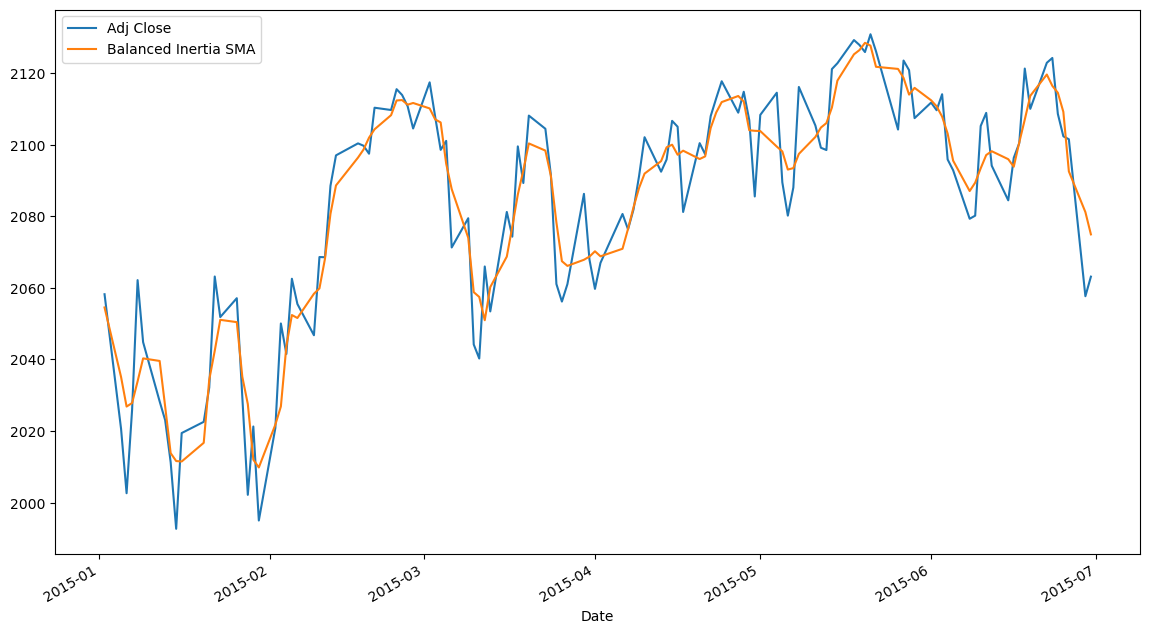

In [22]:
composite_value_df[[
    'Adj Close'
    # , 'Short SMA'
    # , 'Long SMA'
    # , 'Inertia SMA'
    , 'Balanced Inertia SMA'
]].loc['2015-01-01':'2015-06-30'].plot(
    figsize=(14,8),
    # marker="o"
)

In [23]:
# Composite Daily Returns

# Create the dataframe
composite_daily_returns_df = sp500_reference_dataframe[['Daily Returns']].copy()

# Add the SMA Comparison values
composite_daily_returns_df['SMA Signal Daily Returns'] = sma_window_comparison_df['SMA Signal Daily Returns']

# Add the Inertia SMA values
composite_daily_returns_df['Inertia SMA Signal Daily Returns'] = sma_inertia_df['Inertia SMA Signal Daily Returns']

# Add the Balanced Inertia SMA values
composite_daily_returns_df['Balanced Inertia SMA Signal Daily Returns'] = sma_balanced_inertia_df['Balanced Inertia SMA Signal Daily Returns']

In [24]:
composite_daily_returns_df = composite_daily_returns_df.dropna()

composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns
Date,,,,
2000-01-05,0.001922,0.0,0.000000,0.000000
2000-01-06,0.000956,0.0,0.000000,0.000000
2000-01-07,0.027090,0.0,0.000000,0.000000
2000-01-10,0.011190,0.0,0.000000,0.011190
2000-01-11,-0.013063,-0.0,-0.013063,-0.013063


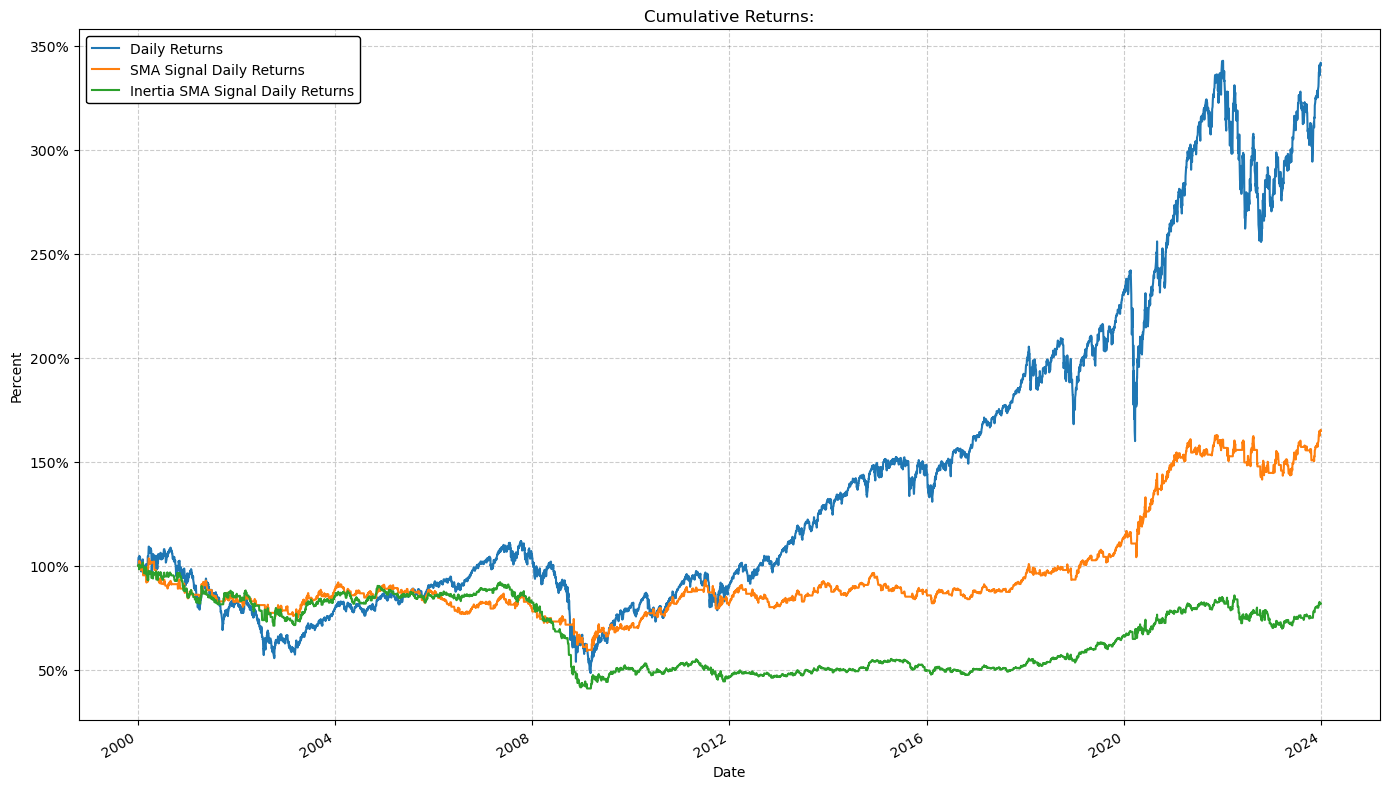

In [25]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        , 'SMA Signal Daily Returns'
        , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
    ]]
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [26]:
# Composite Signals DF

# Create the dataframe
trading_signals_df = sp500_reference_dataframe.copy()

# Add the Manual Signal values
trading_signals_df['Manual Signal'] = manual_signals_df['Manual Signal']

# Add the SMA Comparison values
trading_signals_df['SMA Signal'] = sma_window_comparison_df['SMA Signal']

# Add the Inertia SMA values
trading_signals_df['Inertia SMA Signal'] = sma_inertia_df['Inertia SMA Signal']

# Add the Balanced Inertia SMA values
trading_signals_df['Balanced Inertia SMA Signal'] = sma_balanced_inertia_df['Balanced Inertia SMA Signal']

In [27]:
trading_signals_df = trading_signals_df.dropna()

trading_signals_df.head(50)

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal
Date,,,,,,
2000-01-05,1402.109985,0.001922,1.0,0.0,0.0,0.0
2000-01-06,1403.449951,0.000956,1.0,0.0,0.0,0.0
2000-01-07,1441.469971,0.027090,1.0,0.0,0.0,1.0
2000-01-10,1457.599976,0.011190,1.0,0.0,1.0,1.0
2000-01-11,1438.560059,-0.013063,1.0,0.0,1.0,1.0
2000-01-12,1432.250000,-0.004386,1.0,1.0,1.0,1.0
2000-01-13,1449.680054,0.012170,1.0,1.0,1.0,1.0
2000-01-14,1465.150024,0.010671,1.0,1.0,1.0,1.0
2000-01-18,1455.140015,-0.006832,1.0,1.0,1.0,1.0


### Creating a Feature Dataset

Note that the target column is also in the dataset.

Handling NA() values in the rolling window:
- https://stackoverflow.com/questions/71788354/pandas-rolling-mean-and-ignore-nan

In [28]:
# Create the dataframe
# features_and_target_df = trading_signals_df[['Balanced Inertia SMA Signal']].copy()
features_and_target_df = trading_signals_df[['Manual Signal']].copy()

# features_and_target_df = features_and_target_df.rename(columns={'Balanced Inertia SMA Signal':'Signal'})
features_and_target_df = features_and_target_df.rename(columns={'Manual Signal':'Signal'})

In [29]:
# # Add features to the dataframe

sma_short_window_var = 4
sma_mid_window_var = 10
sma_long_window_var = 15

# # S&P attributes

# Percent change from the day before
features_and_target_df['SP500_pct_change'] = sp500_reference_dataframe['Daily Returns']

# Percent change in the SMA short window since yesterday
features_and_target_df['SP500_SMA_short_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_short_window_var).mean().pct_change()

# Percent change in the SMA mid window since yesterday
features_and_target_df['SP500_SMA_mid_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_mid_window_var).mean().pct_change()

# Percent change in the SMA long window since yesterday
features_and_target_df['SP500_SMA_long_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_long_window_var).mean().pct_change()


# # # Treasury Bill Attributes: Note that all of the Treasury Bill values are already percents

# # 3 Month Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US3M_pct_change'] = tbill_summary_df[['US3M']].dropna() - tbill_summary_df[['US3M']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US3M_SMA_short_pct_change'] = tbill_summary_df[['US3M']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US3M_SMA_mid_pct_change'] = tbill_summary_df[['US3M']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US3M_SMA_long_pct_change'] = tbill_summary_df[['US3M']].dropna().rolling(window=sma_long_window_var).mean()

# # 2 Year Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US2Y_pct_change'] = tbill_summary_df[['US2Y']].dropna() - tbill_summary_df[['US2Y']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US2Y_SMA_short_pct_change'] = tbill_summary_df[['US2Y']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US2Y_SMA_mid_pct_change'] = tbill_summary_df[['US2Y']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US2Y_SMA_long_pct_change'] = tbill_summary_df[['US2Y']].dropna().rolling(window=sma_long_window_var).mean()

# # 10 Year Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US10Y_pct_change'] = tbill_summary_df[['US10Y']].dropna() - tbill_summary_df[['US10Y']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US10Y_SMA_short_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US10Y_SMA_mid_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US10Y_SMA_long_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_long_window_var).mean()

In [30]:
features_and_target_df = features_and_target_df.dropna()

features_and_target_df.head(20)

,Signal,SP500_pct_change,SP500_SMA_short_pct_change,SP500_SMA_mid_pct_change,SP500_SMA_long_pct_change,US3M_pct_change,US3M_SMA_short_pct_change,US3M_SMA_mid_pct_change,US3M_SMA_long_pct_change,US2Y_pct_change,US2Y_SMA_short_pct_change,US2Y_SMA_mid_pct_change,US2Y_SMA_long_pct_change,US10Y_pct_change,US10Y_SMA_short_pct_change,US10Y_SMA_mid_pct_change,US10Y_SMA_long_pct_change
Date,,,,,,,,,,,,,,,,,
2000-01-06,1.0,0.000956,-0.011491,-0.002260,-0.000458,-0.03,5.4400,5.389,5.433333,-0.03,6.3525,6.273,6.246000,-0.05,6.5650,6.474,6.432000
2000-01-07,1.0,0.027090,-0.002429,-0.001169,0.001053,-0.03,5.4150,5.380,5.432667,-0.04,6.3350,6.280,6.256667,-0.05,6.5500,6.485,6.446000
2000-01-10,1.0,0.011190,0.010304,0.000035,0.001695,0.04,5.4125,5.375,5.431333,0.07,6.3550,6.297,6.272000,0.05,6.5700,6.502,6.464000
2000-01-11,1.0,-0.013063,0.006390,-0.001325,0.000947,0.01,5.4100,5.377,5.418000,0.07,6.3725,6.319,6.288000,0.10,6.5825,6.526,6.484667
2000-01-12,1.0,-0.004386,0.005016,-0.002168,-0.000055,0.02,5.4200,5.399,5.408667,0.04,6.4075,6.347,6.306667,0.05,6.6200,6.558,6.507333
2000-01-13,1.0,0.012170,0.001423,-0.001030,0.000626,-0.04,5.4275,5.418,5.398667,-0.09,6.4300,6.368,6.317333,-0.09,6.6475,6.582,6.523333
2000-01-14,1.0,0.010671,0.001307,-0.000286,0.000315,0.00,5.4250,5.426,5.394667,0.04,6.4450,6.388,6.330667,0.06,6.6775,6.606,6.542000
2000-01-18,1.0,-0.006832,0.002866,-0.000006,-0.000091,0.15,5.4575,5.434,5.400667,0.03,6.4500,6.397,6.348000,0.06,6.6975,6.623,6.565333
2000-01-19,1.0,0.000522,0.004076,0.003937,-0.000081,-0.05,5.4725,5.442,5.407333,-0.01,6.4425,6.413,6.363333,-0.02,6.7000,6.647,6.585333


In [31]:
# tbill_summary_df[['US10Y']].loc['2021-01-15':'2021-02-25']

## Logistic Regression Model

In [32]:
# Split the data into training and testing sets based on dates
train_data = features_and_target_df.loc['2000-01-06':'2014-12-31']
test_data = features_and_target_df.loc["2015-01-01":"2023-01-01"]

In [33]:
# Check the class sizes of the signals
train_data['Signal'].value_counts()

Signal
1.0    2598
0.0    1144
Name: count, dtype: int64

In [34]:
# Create the training and testing dataframes
X_train = train_data.drop(columns=['Signal'])
y_train = train_data['Signal']

X_test = test_data.drop(columns=['Signal'])
y_test = test_data['Signal']

# Review the features dataframe
# X_train.head()
# y_train.head()
# X_test.head()
# y_test.head()

In [35]:
# Scale the features using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Create an instance of the LR model
logistic_regression = LogisticRegression()

# Fit the model
logistic_regression = logistic_regression.fit(X_train_scaled, y_train)

# Make predictions:
predicted_signals = logistic_regression.predict(X_test_scaled)

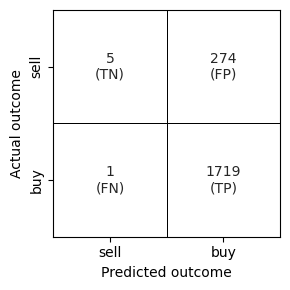

In [37]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, predicted_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='lr', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [38]:
# Make a classification report
print(classification_report(y_test, predicted_signals))

              precision    recall  f1-score   support

         0.0       0.83      0.02      0.04       279
         1.0       0.86      1.00      0.93      1720

    accuracy                           0.86      1999
   macro avg       0.85      0.51      0.48      1999
weighted avg       0.86      0.86      0.80      1999



In [39]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
lr_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
lr_signals_df['LR Model Signals'] = predicted_signals

# Review the copied dataframe
lr_signals_df.head()

,Signal,LR Model Signals
Date,,
2015-01-02,1.0,1.0
2015-01-05,1.0,1.0
2015-01-06,1.0,1.0
2015-01-07,1.0,1.0
2015-01-08,1.0,1.0


In [40]:
# Add the LR Model Returns to the composite_daily_returns_df
composite_daily_returns_df['LR Model Returns'] = composite_daily_returns_df['Daily Returns'] * lr_signals_df['LR Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head(50)

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,LR Model Returns
Date,,,,,
2015-01-05,-0.018278,-0.018278,-0.000000,-0.000000,-0.018278
2015-01-06,-0.008893,-0.008893,-0.000000,-0.000000,-0.008893
2015-01-07,0.011630,0.000000,0.000000,0.000000,0.011630
2015-01-08,0.017888,0.000000,0.000000,0.017888,0.017888
2015-01-09,-0.008404,-0.000000,-0.008404,-0.008404,-0.008404
2015-01-12,-0.008094,-0.000000,-0.008094,-0.008094,-0.008094
2015-01-13,-0.002579,-0.000000,-0.002579,-0.000000,-0.002579
2015-01-14,-0.005813,-0.000000,-0.000000,-0.000000,-0.005813
2015-01-15,-0.009248,-0.000000,-0.000000,-0.000000,-0.009248


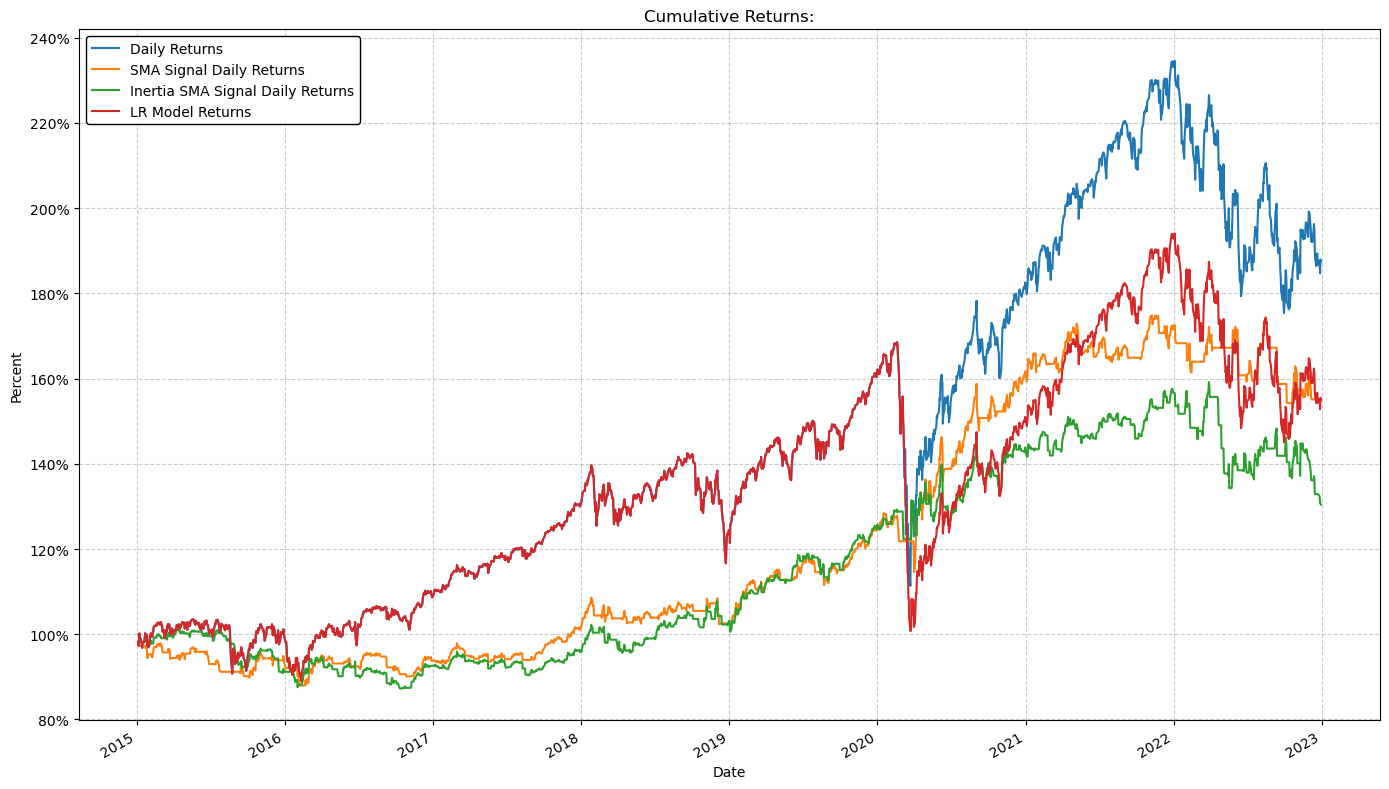

In [41]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        , 'SMA Signal Daily Returns'
        , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        , 'LR Model Returns'
    ]]
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [42]:
# Append the signals to the trading_signals_df
trading_signals_df['LR Model Signals'] = lr_signals_df['LR Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals
Date,,,,,,,
2015-01-02,2058.199951,-0.000340,1.0,1.0,0.0,0.0,1.0
2015-01-05,2020.579956,-0.018278,1.0,1.0,0.0,0.0,1.0
2015-01-06,2002.609985,-0.008893,1.0,0.0,0.0,0.0,1.0
2015-01-07,2025.900024,0.011630,1.0,0.0,0.0,1.0,1.0
2015-01-08,2062.139893,0.017888,1.0,0.0,1.0,1.0,1.0


### Neural Network Model

Note that this intentionally uses the same training and test data sets as the logistic regression model above.

In [43]:
# Define the the number of inputs (features) to the model
# The number of features in the dataset is the length of any row
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

16

In [44]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [45]:
# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

8

In [46]:
# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

4

In [47]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
# Specify the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
# Specify the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


117/117 [==============================] - 3s 3ms/step - loss: 0.5923 - accuracy: 0.7173
Epoch 2/50
117/117 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.7392
Epoch 3/50
117/117 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7509
Epoch 4/50
117/117 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7608
Epoch 5/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7670
Epoch 6/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7678
Epoch 7/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7704
Epoch 8/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7758
Epoch 9/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7785
Epoch 10/50
117/117 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.77

In [50]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

63/63 - 0s - loss: 0.5184 - accuracy: 0.8484 - 481ms/epoch - 8ms/step
Loss: 0.5184284448623657, Accuracy: 0.8484241962432861


In [51]:
# Predict the signals
nn_predictions = nn.predict(X_test_scaled)

# Review the predictions
nn_predictions[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.91773415],
       [0.7019203 ],
       [0.7537179 ],
       [0.9007656 ],
       [0.88789934],
       [0.92292935],
       [0.83719146],
       [0.81499875],
       [0.717729  ],
       [0.6314742 ]], dtype=float32)

In [52]:
# The signals must be a 0 or 1, but sigmoid outputs a continuous value
# Whenever the prediction is greater than or equal to 0.5, make the signal a 1
# Otherwise make the signal 0

# Initialize an empty array
nn_signals = []

# Assign the signals
for i in range(0,len(nn_predictions)):
    if nn_predictions[i] >= 0.5:
        nn_signals.append(1.0)
    else:
        nn_signals.append(0.0)

In [53]:
# Review the value counts for each signal
pd.DataFrame(nn_signals).value_counts()

1.0    1835
0.0     164
Name: count, dtype: int64

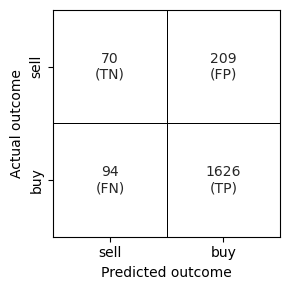

In [54]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, nn_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='nn', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [55]:
# Make a classification report
print(classification_report(y_test, nn_signals))

              precision    recall  f1-score   support

         0.0       0.43      0.25      0.32       279
         1.0       0.89      0.95      0.91      1720

    accuracy                           0.85      1999
   macro avg       0.66      0.60      0.62      1999
weighted avg       0.82      0.85      0.83      1999



In [56]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
nn_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
nn_signals_df['NN Model Signals'] = nn_signals

# Review the copied dataframe
nn_signals_df.head()

,Signal,NN Model Signals
Date,,
2015-01-02,1.0,1.0
2015-01-05,1.0,1.0
2015-01-06,1.0,1.0
2015-01-07,1.0,1.0
2015-01-08,1.0,1.0


In [57]:
# Add the NN Model Returns to the composite_daily_returns_df
composite_daily_returns_df['NN Model Returns'] = composite_daily_returns_df['Daily Returns'] * nn_signals_df['NN Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head(50)

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,LR Model Returns,NN Model Returns
Date,,,,,,
2015-01-05,-0.018278,-0.018278,-0.000000,-0.000000,-0.018278,-0.018278
2015-01-06,-0.008893,-0.008893,-0.000000,-0.000000,-0.008893,-0.008893
2015-01-07,0.011630,0.000000,0.000000,0.000000,0.011630,0.011630
2015-01-08,0.017888,0.000000,0.000000,0.017888,0.017888,0.017888
2015-01-09,-0.008404,-0.000000,-0.008404,-0.008404,-0.008404,-0.008404
2015-01-12,-0.008094,-0.000000,-0.008094,-0.008094,-0.008094,-0.008094
2015-01-13,-0.002579,-0.000000,-0.002579,-0.000000,-0.002579,-0.002579
2015-01-14,-0.005813,-0.000000,-0.000000,-0.000000,-0.005813,-0.005813
2015-01-15,-0.009248,-0.000000,-0.000000,-0.000000,-0.009248,-0.009248


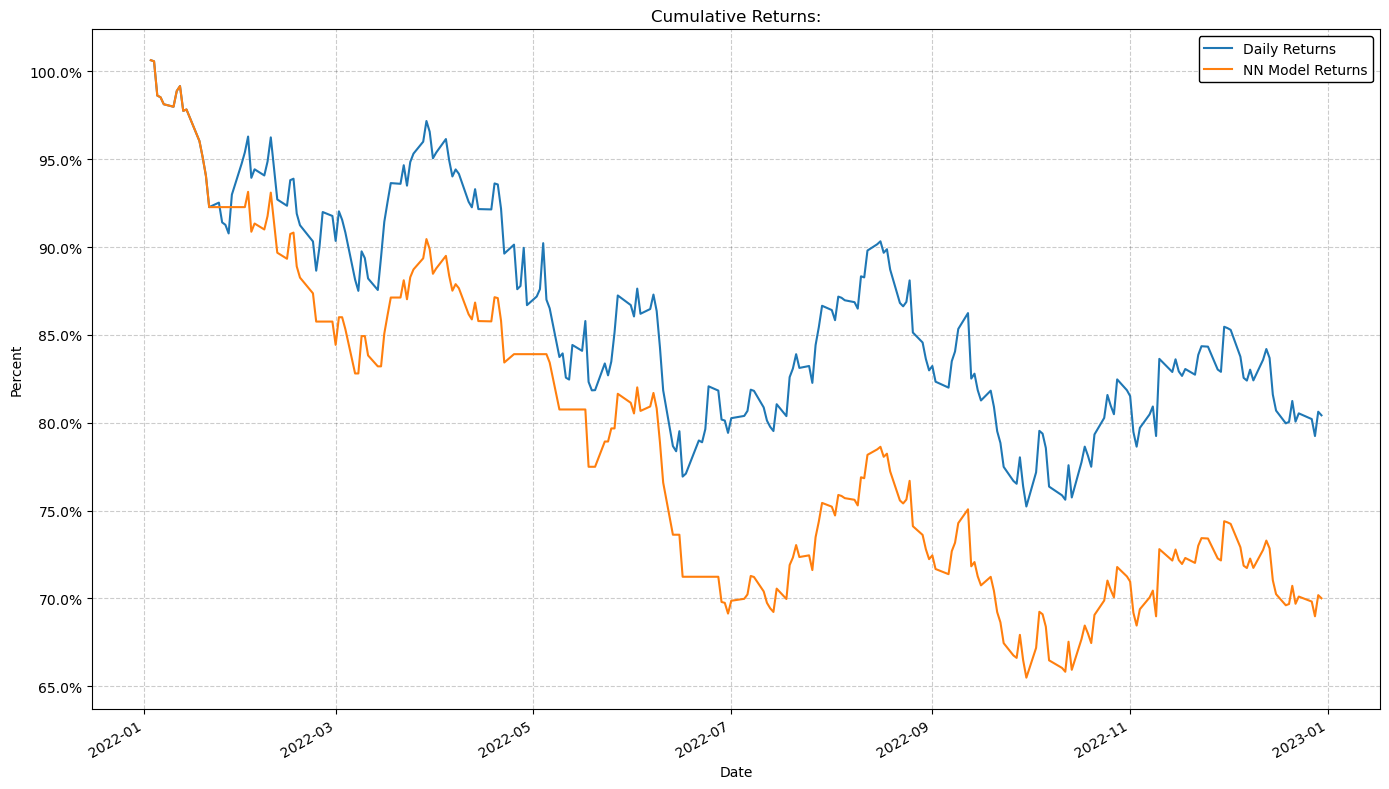

In [58]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        # , 'SMA Signal Daily Returns'
        # , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        # , 'LR Model Returns'
        , 'NN Model Returns'
    ]].loc['2022-01-01':'2022-12-31']
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [59]:
# Append the signals to the trading_signals_df
trading_signals_df['NN Model Signals'] = nn_signals_df['NN Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals,NN Model Signals
Date,,,,,,,,
2015-01-02,2058.199951,-0.000340,1.0,1.0,0.0,0.0,1.0,1.0
2015-01-05,2020.579956,-0.018278,1.0,1.0,0.0,0.0,1.0,1.0
2015-01-06,2002.609985,-0.008893,1.0,0.0,0.0,0.0,1.0,1.0
2015-01-07,2025.900024,0.011630,1.0,0.0,0.0,1.0,1.0,1.0
2015-01-08,2062.139893,0.017888,1.0,0.0,1.0,1.0,1.0,1.0
